<a href="https://colab.research.google.com/github/Shivii-Jain/Brain-Tumor-Classification/blob/main/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive

In [2]:
import os
import keras
from keras.models import Sequential
from keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])  # 0 = tumor, 1 = no tumor


OneHotEncoder()

In [4]:
# With tumor

data = []
paths = []
result = []


for r, d, f in os.walk(r'/content/drive/My Drive/brain/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:  # If it’s a .jpg file (an image), store its full path in paths
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [5]:
# Without tumor

paths = []
for r, d, f in os.walk(r"/content/drive/My Drive/brain/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))  # data with yes already appended in above cell, now add no tumor
        result.append(encoder.transform([[1]]).toarray())

In [6]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

139 images of 128 * 128 and 3 channels

In [7]:
print(f'Total number of images: {len(data)}')

Total number of images: 139


In [8]:
result = np.array(result)
result = result.reshape(139,2)

Splitting data into training and testing

In [9]:
X_train,X_test,y_train,y_test = train_test_split(data,result,test_size=0.2,shuffle=True)

In [10]:
print(f'Number of images in training set: {len(X_train)} \nNumber of images in testing set: {len(X_test)}')

Number of images in training set: 111 
Number of images in testing set: 28


Model Architecture

In [11]:
model = Sequential()
model.add(Input(shape=(128,128,3)))
model.add(Conv2D(32,kernel_size=(2,2),padding="Same"))
model.add(Conv2D(32, kernel_size=(2, 2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,585,602 (128.12 MB)

 Trainable params: 33,585,410 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

The dense_11 (last layer) shape is (None,2) which implies 2 output classes = > 1 and 0 in our case

Model Evaluation

In [12]:
y_train.shape

(111, 2)

In [ ]:
his = model.fit(X_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (X_test, y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.5189 - loss: 30.0208 - val_accuracy: 0.5000 - val_loss: 208.2690
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6507 - loss: 43.8631 - val_accuracy: 0.7143 - val_loss: 20.2661
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.7686 - loss: 9.9699 - val_accuracy: 0.6429 - val_loss: 24.6636
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.7534 - loss: 7.8292 - val_accuracy: 0.8929 - val_loss: 3.4656
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.8582 - loss: 2.0017 - val_accuracy: 0.5714 - val_loss: 8.8584
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.8269 - loss: 3.3621 - val_accuracy: 0.6786 - val_loss: 6.8008
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.9313 - loss: 1.3117 - val_accuracy: 0.6071 - val_loss: 14.5048
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.8834 - loss: 1.6506 - val_accuracy: 0.6786 - val_loss: 9.7602
Epo

loss: 1.0573e-06 - val_loss: 2.8568

Plotting model loss

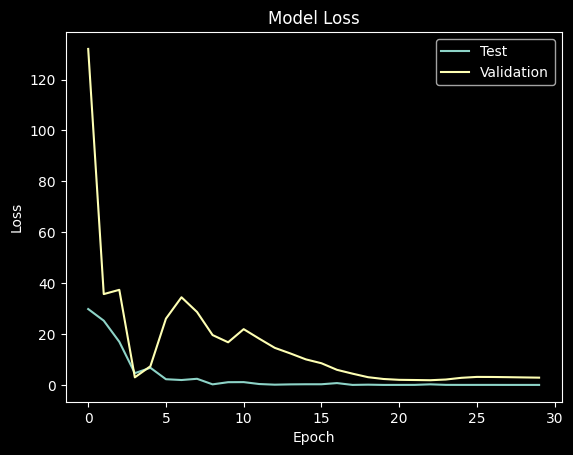

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

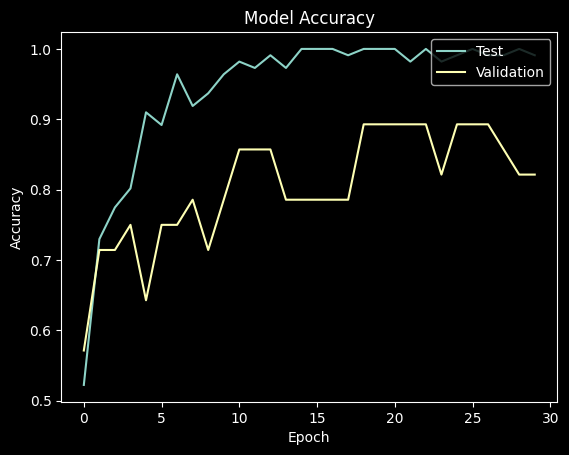

In [ ]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

Testing

In [ ]:
def labels(number):
    if number==0:
        return 'It is a Tumor'
    else:
        return 'It is not a tumor'

99.96135% Confidence: It is not a tumor


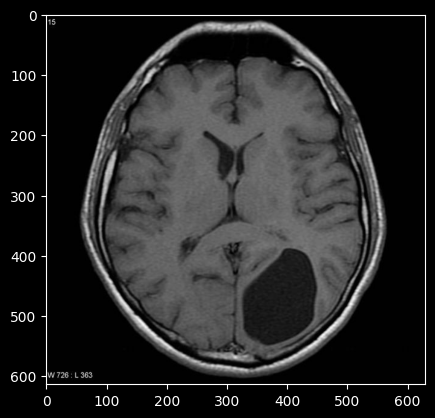

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/My Drive/brain/brain_tumor_dataset/no/N11.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence: ' + labels(classification))

100.0% Confidence: It is a Tumor


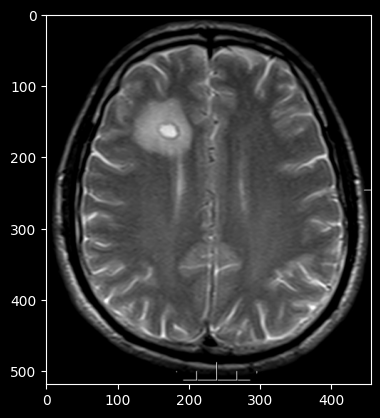

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/My Drive/brain/brain_tumor_dataset/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence: ' + labels(classification))

In [ ]:
!pip install --upgrade gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: gradio-client
    Found existing installation: gradio_client 1.10.1
    Uninstalling gradio_client-1.10.1:
      Successfully uninstalled gradio_client-1.10.1
  Attempting uninstall: gradio
    Found existing installation: gradio 5.31.0
    Uninstalling gradio-5.31.0:
      Successfully uninstalled gradio-5.31.0


In [ ]:
import gradio as gr

In [ ]:
heading_title = "Brain tumor classification Application"

In [ ]:
num_examples = 3

example_path_1:  /content/drive/MyDrive/brain/brain_tumor_dataset/yes/Y1.jpg
example_path_2:  /content/drive/MyDrive/brain/brain_tumor_dataset/yes/Y104.jpg
example_path_3:  /content/drive/MyDrive/brain/brain_tumor_dataset/no/15 no.jpg


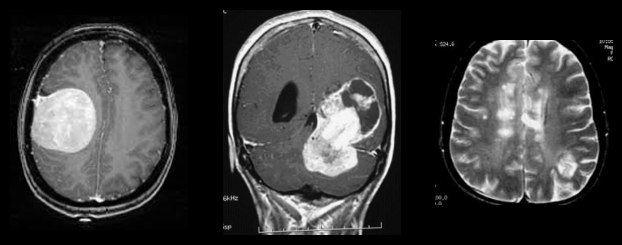

In [ ]:

from matplotlib import pyplot as plt
from PIL import Image
examples=[]
for i in range(num_examples):
  example_path = input(f"example_path_{i+1}:  ")
  examples.append(example_path)

#Displaying the selected images side by side
rows = 1
plt.figure(figsize=(16, 8))
for num, x in enumerate(examples):
    img = Image.open(x)
    plt.subplot(rows,6,num+1)
   # plt.title(x.split('.')[0])
    plt.axis('off')
    plt.imshow(img)


In [ ]:
desc = "Select an image from examples or upload one to predict if brain tumor is present or not through MRI images"
long_desc = """ 📚 About the Model

- This is a CNN trained on MRI scans.
- The output is Tumor or No Tumor.

"""

In [ ]:
def recognize_image(image):

    img = Image.fromarray(image).resize((128, 128))

    x = np.array(img)
    x = x.reshape(1, 128, 128, 3)

    # Make a prediction
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]

    class_names = ['No Tumor', 'Tumor']
    result = f"{labels(classification)}"

    return result

In [ ]:
image = gr.Image()
label = gr.Label()

iface = gr.Interface(
    fn=recognize_image,
    inputs=image,
    outputs=label,
    examples=examples,
    title=heading_title,
    description=desc,
    article=long_desc,
    theme = gr.themes.Soft()
)

iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://c636964a98648b2d3b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Using existing dataset file at: .gradio/flagged/dataset1.csv
Keyboard interruption in main thread... closing server.


KeyboardInterrupt: 